In [1]:
import scanpy as sc
import squidpy as sq

Dataset with 1 image

In [50]:
#Load dataset 
adata = sq.datasets.imc()

In [27]:
adata.X.shape

(4668, 34)

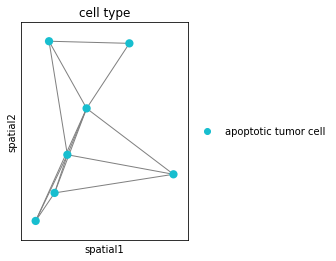

In [51]:
#Sample nodes from training data 
import numpy as np
randint=np.random.randint(0,adata.n_obs+1)
sq.gr.spatial_neighbors(adata, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][randint, :].nonzero()
idx = np.append(idx, randint)
sc.pl.spatial(
    adata[idx, :],
    color="cell type",
    neighbors_key="spatial_neighbors",
    spot_size=1,
    edges=True,
    edges_width=1,
    img_key=None,
)

In [52]:
#Get adjacency matrix
A=adata.obsp['spatial_connectivities']

In [53]:
#Get edge index
indices=A.nonzero()
edge_index=torch.tensor(np.array(indices))

In [54]:
#Get features of nodes 
import pandas as pd
X=adata.obs
X=pd.get_dummies(X)
X=X.to_numpy()

In [91]:
X.shape

(4668, 11)

In [55]:
#Get labels of nodes
Y=adata.X


In [119]:
#Sample n nodes + 1-neighbour and save individual graphs in files (iterate over all nodes)

n=200
no_batches=adata.n_obs//200
for batch in range(no_batches):
    indices=np.random.choice(adata.n_obs, size=200)
    #get features and labels of selected nodes
    X_s=X[indices]
    Y_s=Y[indices]

    #get node indices of direct neighbours (Output: list of length n)
    neigh_ind=[]
    neigh_max=0
    for index in indices:
        neigh_ind.append(A[index].nonzero()[1])
        neigh_max=max(neigh_max,len(A[index].nonzero()[0]))

    #Use neigh_ind to get features of all neighbours of each sampled node (Output array n x neighbours[padded] x features)
    
    #How to do this?
    #Do we want output array: For batch i: no. node samples x neighbours[padded] x features (e.g.200 x max_neighs x no features)
    
    '''X_neigh_all = []
    for index in range(n):
        X_neigh=np.zeros([neigh_max,X.shape[1]])
        for i in 
        for i, neigh in (range(neigh_max),neigh_ind[index]):
            X_neigh[i]=X[neigh]
        X_neigh_all.append(X_neigh)'''


Create Pytorch Geometric dataset

In [ ]:
#Create PyG dataset from graphs saved in files
from torch_geometric.data import Dataset, Data
class MyCustomDataset(Dataset):
    def __init__():
        self.filename = .. # List of raw files, in your case point cloud
        super(MyCustomDataset, self).__init()

    @property
    def raw_file_names(self):
        return self.filename
    
    @property
    def processed_file_names(self):
        """ return list of files should be in processed dir, if found - skip processing."""
        processed_filename = []
        return processed_filename
    def download(self):
        pass

    def process(self):
        for file in self.raw_paths:
            self._process_one_step(file)

    def _process_one_step(self, path):
        out_path = (self.processed_dir, "some_unique_filename.pt")
        # read your point cloud here, 
        # convert point cloud to Data object
        data = Data(x=node_features,
                    edge_index=edge_index,
                    edge_attr=edge_attr,
                    y=label #you can add more arguments as you like
                    )
        torch.save(data, out_path)
        return

    def __len__(self):
        return len(self.processed_file_names)

    def __getitem__(self, idx):
        data = torch.load(os.path.join(self.processed_dir, self.processed_file_names[idx]))
        return data

In [68]:
#Sample n nodes and save individual graphs in files (iterate over all nodes)
import torch
from torch_geometric.data import Data

x = torch.tensor(X, dtype=torch.float)

data=Data(x=x, edge_index=edge_index)


    



In [70]:
data

Data(x=[4668, 11], edge_index=[2, 28008])

In [72]:
P=np.array([[0,1,1,1],[1,0,1,0],[1,1,0,0],[1,0,0,0]])

In [87]:
indices =[0,1]
neigh_ind=[]
for index in indices:
    neigh_ind.append(P[index].nonzero()[0])

In [88]:
neigh_ind

[array([1, 2, 3]), array([0, 2])]

In [86]:
P[index].nonzero()[0]

array([0, 2])